About Dataset
https://www.kaggle.com/datasets/sachinkumar62/datascience-job-data

This dataset contains information on job candidates applying for data science roles. It includes demographic details, education background, work experience, and training hours. The target variable indicates whether a candidate is looking for a new job (1) or not (0).

Key Columns

enrollee_id: Unique identifier for each candidate.

city: City where the candidate is located.

city_development_index: Development index score of the city (0-1 scale).

gender: Candidate's gender (Male, Female, Other).

relevent_experience: Whether the candidate has relevant experience.

enrolled_university: Candidate’s enrollment status (full-time, part-time, or not enrolled).

education_level: Highest level of education.

major_discipline: Field of study (STEM, Business, etc.).

experience: Years of professional experience.

company_size: Size of the last company worked at.

company_type: Type of company (e.g., Pvt Ltd, Startup, etc.).

training_hours: Hours spent in training.

target: Binary indicator (1 = looking for a new job, 0 = not looking).


First I uploaded the file, and loaded in memory.
Now I can take a look at the data, and some propertys of the data.

In [10]:

link = 'data_science_job.csv'

import pandas as pd

df = pd.read_csv(link)

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


Now that I can see that there is some not a number/null values I have to decide what to do with them.

**What is the most common education level among job candidates?**

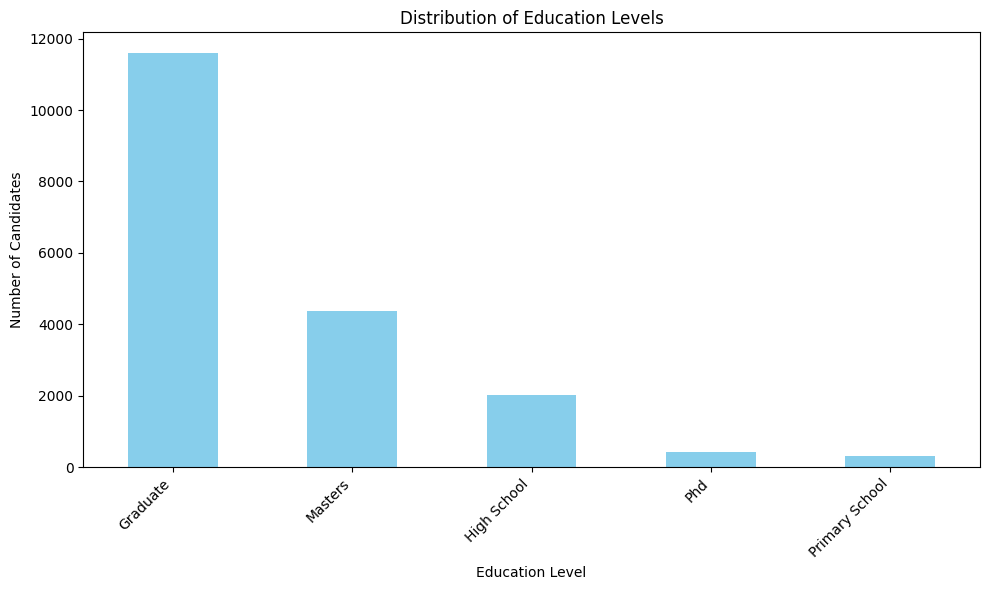

The most common education level is: Graduate


In [12]:
import matplotlib.pyplot as plt

# Count the occurrences of each education level
education_counts = df['education_level'].value_counts()

# Get the most common education level
most_common_education = education_counts.index[0]

# Plot the education levels as a bar chart
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print(f"The most common education level is: {most_common_education}")

**Which major discipline is most represented in the dataset?**

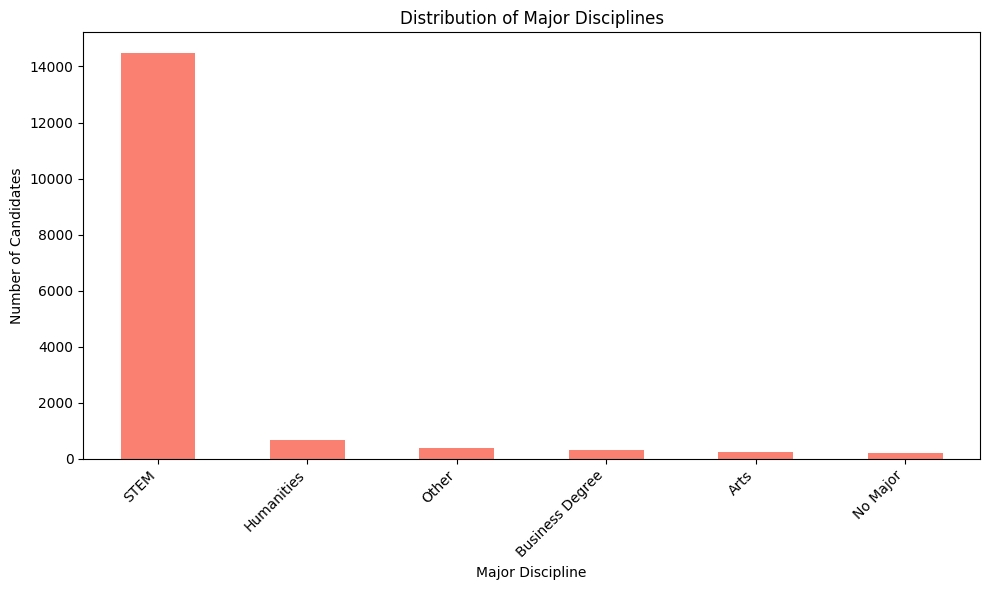

The most represented major discipline is: STEM


In [13]:
# Count the occurrences of each major discipline
major_counts = df['major_discipline'].value_counts()

# Get the most represented major discipline
most_common_major = major_counts.index[0]

# Plot the major disciplines as a bar chart
plt.figure(figsize=(10, 6))
major_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Major Disciplines')
plt.xlabel('Major Discipline')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The most represented major discipline is: {most_common_major}")

**How many candidates have relevant experience?**

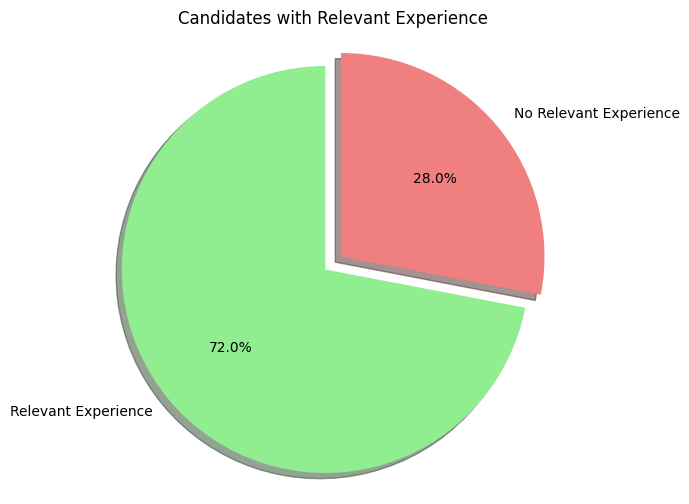

Number of candidates with relevant experience: 13792


In [14]:
# Filter for candidates with relevant experience
relevant_experience_candidates = df[df['relevent_experience'] == 'Has relevent experience']

# Get the count of candidates with relevant experience
num_relevant_experience = len(relevant_experience_candidates)

# Create a pie chart
labels = ['Relevant Experience', 'No Relevant Experience']
sizes = [num_relevant_experience, len(df) - num_relevant_experience]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice (Relevant Experience)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Candidates with Relevant Experience')
plt.show()

print(f"Number of candidates with relevant experience: {num_relevant_experience}")

**What is the average number of training hours completed by candidates?**

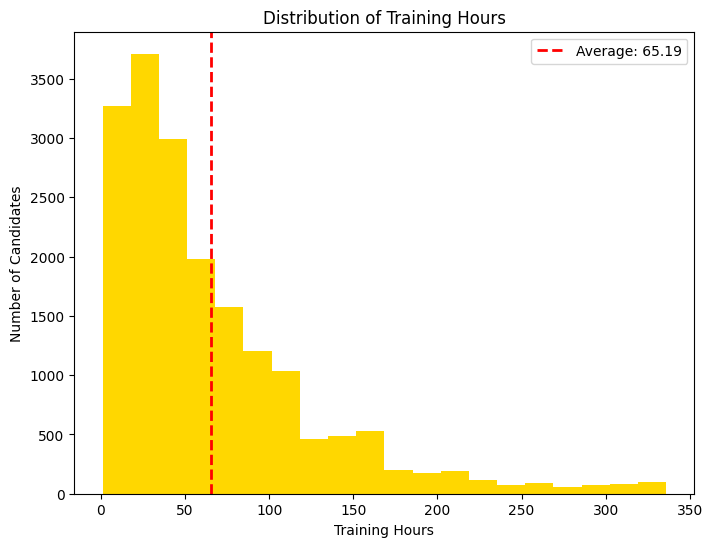

The average number of training hours completed by candidates is: 65.19


In [15]:
# Calculate the average training hours
average_training_hours = df['training_hours'].mean()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['training_hours'], bins=20, color='gold')
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Number of Candidates')
plt.axvline(average_training_hours, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_training_hours:.2f}')
plt.legend()
plt.show()

print(f"The average number of training hours completed by candidates is: {average_training_hours:.2f}")

**Which company size has the most job candidates in the dataset?**

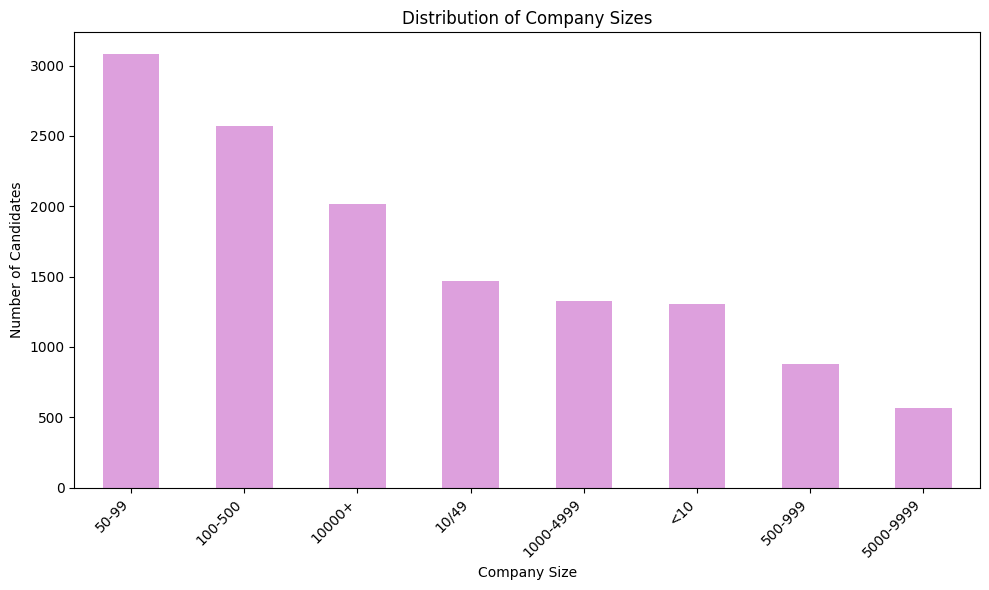

The company size with the most job candidates is: 50-99


In [16]:
# Count the occurrences of each company size
company_size_counts = df['company_size'].value_counts()

# Get the company size with the most candidates
most_common_company_size = company_size_counts.index[0]

# Plot the company sizes as a bar chart
plt.figure(figsize=(10, 6))
company_size_counts.plot(kind='bar', color='plum')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The company size with the most job candidates is: {most_common_company_size}")